In [81]:
import yfinance as yf

In [82]:
import pandas as pd

In [83]:
sp500 = yf.Ticker("^GSPC")

In [84]:
sp500 = sp500.history(period = "max")

In [85]:
sp500 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,4568.839844,4590.919922,4565.220215,4585.589844,3818880000,0.0,0.0
2023-12-08 00:00:00-05:00,4576.200195,4609.229980,4574.060059,4604.370117,3707010000,0.0,0.0
2023-12-11 00:00:00-05:00,4593.390137,4623.709961,4593.390137,4622.439941,3823210000,0.0,0.0


<Axes: xlabel='Date'>

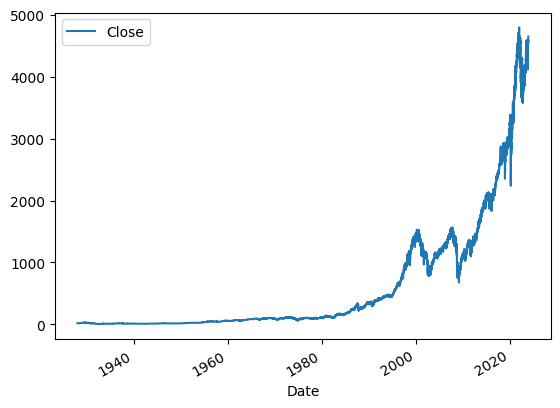

In [86]:
sp500.plot.line(y="Close",use_index=True)

In [87]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [88]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [89]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [90]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,4568.839844,4590.919922,4565.220215,4585.589844,3818880000,4604.370117,1
2023-12-08 00:00:00-05:00,4576.200195,4609.229980,4574.060059,4604.370117,3707010000,4622.439941,1
2023-12-11 00:00:00-05:00,4593.390137,4623.709961,4593.390137,4622.439941,3823210000,4643.700195,1


In [91]:
sp500 = sp500.loc["1990-01-01":].copy()

In [92]:
from sklearn.ensemble import RandomForestClassifier 

In [93]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [94]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"] 
model.fit(train[predictors], train["Target"])
RandomForestClassifier(min_samples_split = 1, random_state = 1)

RandomForestClassifier(min_samples_split=1, random_state=1)

In [95]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [96]:
preds = pd.Series(preds, index = test.index)

In [97]:
precision_score(test["Target"], preds)

0.475

<Axes: xlabel='Date'>

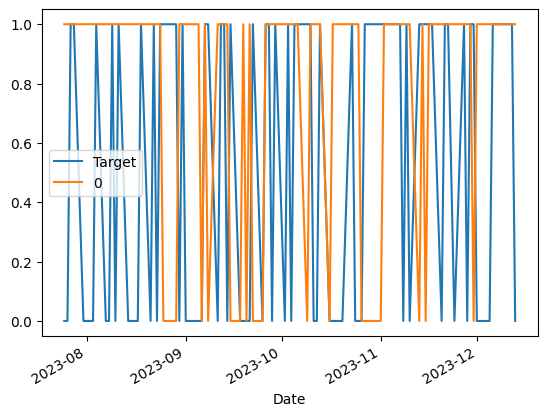

In [101]:
combined = pd.concat([test["Target"], preds] , axis = 1)
combined.plot()

In [106]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictor])
    preds = pd.Series(preds, index - test.index, name = "Predictions")
    combined = pd.concat([tets["Target"], preds], axis =10)
    return combined
    

In [ ]:
def backtest(data, model, predictors, start = 2500, step = 250):